In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_formats = ['svg']
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)

## 1D gradient descent

Minimizing $f(x) = x^2/2$ with gradient descent

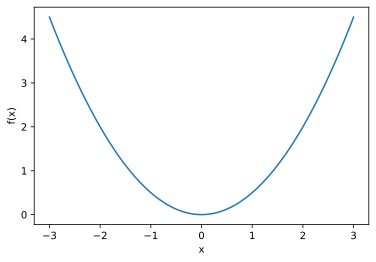

In [2]:
xvec = torch.linspace(-3, 3, steps=100)

def f(x):
    return x**2/2


plt.plot(xvec, f(xvec))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


## Gradient descent:

1. Choose an initial value: $x$

2. Update $x$ to reduce $f(x)$

## Choosing an initial value

$x \leftarrow x_{\text{init}}$

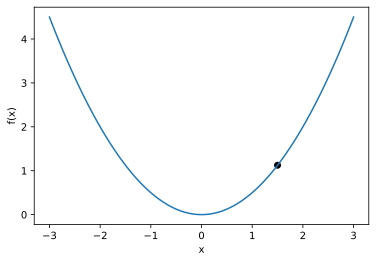

In [3]:
x = 1.5
plt.plot(xvec, f(xvec))
plt.scatter(x, f(x), c="k")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

## Update $x$ to reduce $f(x)$: 

$x \leftarrow x - \alpha \frac{d}{dx}f(x)$

$\approx$ take a step of size $\alpha$ "downhill" to reduce $f(x)$

$x \leftarrow x - \alpha \frac{d}{dx}f(x)$

Here, the derivative is $\frac{d}{dx}f(x) = x$

In [4]:
def update_x(x, learning_rate=0.1):
    return x - learning_rate * x

print(f"x={x:.2f}, f(x)={f(x):.2f}")

x = update_x(x)
print(f"x={x:.2f}, f(x)={f(x):.2f}")

x=1.50, f(x)=1.12
x=1.35, f(x)=0.91


## Do some more updates

x=0.00, f(x)=0.00


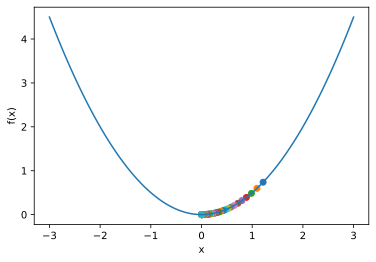

In [5]:
plt.plot(xvec, f(xvec))
plt.xlabel("x")
plt.ylabel("f(x)")

for i in range(100):
    x = update_x(x)
    plt.scatter(x, f(x))

print(f"x={x:.2f}, f(x)={f(x):.2f}")

# Generalizing 1-d gradient descent

Now the input has multiple dimensions.

Want to find a vector that minimizes some function.

# Linear regression

$y_i = \pmb{x}'_i \pmb \beta + \epsilon_i$ for $i=1,...,n$

The parameter $\pmb \beta$ is **2-dimensional**
- intercept $\beta_1$
- slope $\beta_2$

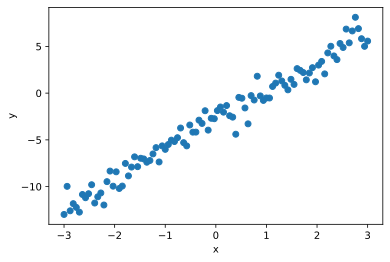

In [6]:
beta_true = torch.tensor([-3., 3])
n = len(xvec)
X = torch.stack((torch.ones(n), xvec), -1)
y = X @ beta_true + torch.randn(n)

plt.scatter(xvec, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Minimizing mean squared error

Find values of $\pmb \beta$ that minimize mean squared error loss.

$L(\pmb \beta) = \frac{1}{n} \sum_{i=1}^n (y_i - \pmb x'_i \pmb \beta)^2$

1. Choose an initial value: 

$\pmb \beta \leftarrow \pmb{\beta}_{\text{init}}$

2. Iteratively update to reduce the loss $L(\pmb \beta)$: 

$\pmb \beta \leftarrow \pmb \beta - \alpha \nabla_{\pmb{\beta}} L(\pmb \beta)$

### Gradients $\approx$ "slope" in each direction

$\nabla_{\pmb{\beta}} L(\pmb \beta) = \Big(\frac{\partial}{\partial \beta_1} L(\pmb \beta), \frac{\partial}{\partial \beta_2} L(\pmb \beta) \Big)$

(Don't worry - pytorch computes this for you!)

![](https://media.giphy.com/media/XyOrJljDNBEpa/giphy.gif)

In [7]:
def mse(yhat, y):
    """ Mean squared error loss """
    return torch.mean((yhat - y)**2)

def update(loss, lr=0.1):
    """ Update beta via gradient descent """
    # compute gradients
    loss.backward()
    
    # update the parameters
    with torch.no_grad():
        beta.sub_(lr * beta.grad)
        beta.grad.zero_()

## Gradient descent

In [8]:
beta_history = []
loss_history = []

# 1. initialize parameters
beta = torch.nn.Parameter(torch.tensor((8, -8.)))

# 2. iteratively update values to reduce loss
for i in range(100):
    beta_history.append(beta.clone().detach())
    yhat = X @ beta
    loss = mse(yhat, y)
    update(loss, lr=0.1)
    loss_history.append(loss.clone().detach())

## How did we do?

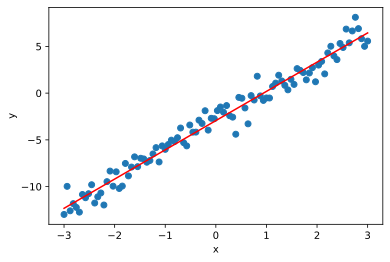

In [9]:
plt.scatter(xvec, y)
plt.plot(xvec, X @ beta.detach().numpy(), c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## What happened to our loss?

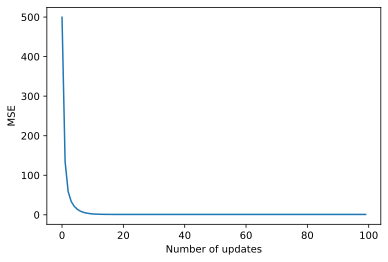

In [10]:
plt.plot(loss_history)
plt.xlabel("Number of updates")
plt.ylabel("MSE")
plt.show()

In [11]:
beta1_grid = torch.linspace(-10, 10, steps=100)
beta2_grid = torch.linspace(-10, 10, steps=100)
loss_grid = torch.zeros((len(beta1_grid), len(beta1_grid)))

for i, beta1 in enumerate(beta1_grid):
    for j, beta2 in enumerate(beta2_grid):
        beta_vec = torch.stack((beta1_grid[i], 
                                beta2_grid[j]),
                               -1)
        yhat = X @ beta_vec
        loss_grid[j, i] = torch.log(mse(yhat, y))

In [12]:
def plot_surface(beta_history):
    fig, ax = plt.subplots()
    CS = ax.contour(beta1_grid.numpy(), 
                    beta2_grid.numpy(), 
                    loss_grid.numpy(), 
                    20)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('MSE loss surface')

    beta_history = np.stack(beta_history, 0)
    ax.scatter(beta_history[:, 0], beta_history[:, 1], c="k")
    ax.plot(beta_history[:, 0], beta_history[:, 1], c="r")
    
    plt.xlabel("beta_1 (intercept)")
    plt.ylabel("beta_2 (slope)")
    plt.show()

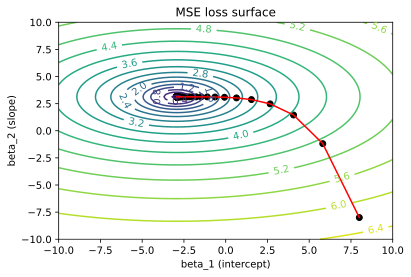

In [13]:
plot_surface(beta_history)

### Fun aside - what happens when x is not centered?

Re-run this notebook, but add one to `xvec` at the beginning...

# Recap of gradient descent

Goal: minimize a loss function

Approach: 

1. Initialize parameters
2. Iteratively update parameters to reduce loss

## Good news about gradient descent

- No calculus necessary (pytorch does this)
- Applies in many situations

## Bad news

- Does not scale

e.g., $\nabla_{\pmb \beta} L(\pmb \beta) = \frac{1}{n} \nabla_{\pmb \beta} \sum_{i=1}^n (y_i - \pmb x'_i \pmb \beta)^2$ for large $n$

# Stochastic gradient descent (SGD)

Updates are based on one example at a time

(not all examples simultaneously)

# SGD for linear regression

In [14]:
beta_history = []
loss_history = []
beta = torch.nn.Parameter(torch.tensor((8, -8.)))

n_epochs = 30
idx = np.arange(n)

for epoch in range(n_epochs):
    np.random.shuffle(idx)
    
    # use one datapoint at a time to update parameters
    for i in idx:
        beta_history.append(beta.clone().detach())
        yhat = X[i, :] @ beta
        loss = mse(yhat, y[i])
        update(loss, lr=0.01)
        loss_history.append(loss.clone().detach())

# What did we learn?

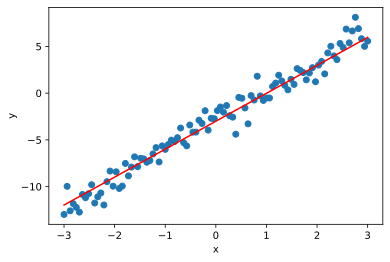

In [15]:
plt.scatter(xvec, y)
plt.plot(xvec, X @ beta.detach().numpy(), c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## What happened to our loss?

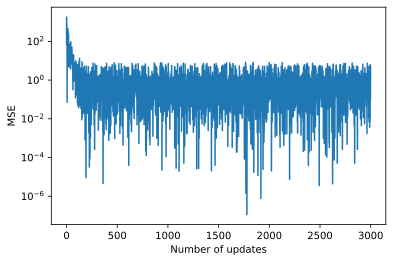

In [16]:
plt.plot(loss_history)
plt.xlabel("Number of updates")
plt.ylabel("MSE")
plt.yscale("log")
plt.show()

# Visualizing the SGD trajectory

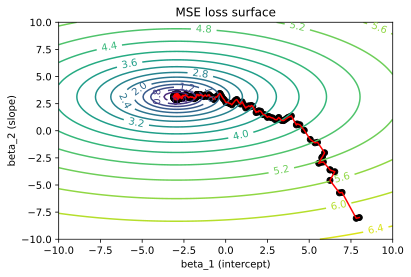

In [17]:
plot_surface(beta_history)

# Recap

### Gradient descent

- Uses all of the data at once
- Is slow

### Stochastic gradient descent

- Uses one datapoint at a time
- Is noisy

# Stochastic Minibatch Gradient Descent

- Uses minibatches of examples
- Faster than GD
- Less noisy than SGD

In [18]:
beta_history = []
loss_history = []
beta = torch.nn.Parameter(torch.tensor((8, -8.)))

dataset = torch.utils.data.TensorDataset(X, y)
loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)

for epoch in range(n_epochs):
    for _, xy in enumerate(loader):
        x_batch, y_batch = xy
        beta_history.append(beta.clone().detach())
        loss = mse(x_batch @ beta, y_batch)
        update(loss, lr=0.01)
        loss_history.append(loss.clone().detach())

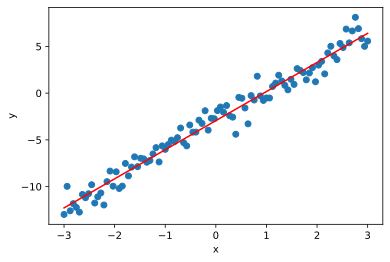

In [19]:
plt.scatter(xvec, y)
plt.plot(xvec, X @ beta.detach().numpy(), c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

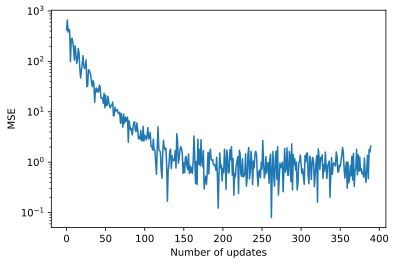

In [20]:
plt.plot(loss_history)
plt.xlabel("Number of updates")
plt.ylabel("MSE")
plt.yscale("log")
plt.show()

# Visualizing the minibatch gradient descent trajectory

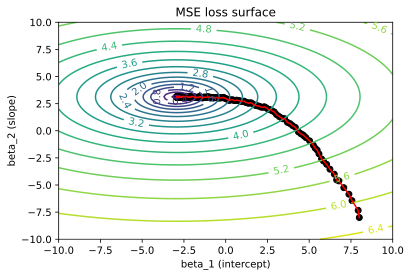

In [21]:
plot_surface(beta_history)

## Choosing minibatch sizes


- Larger batches $\rightarrow$ better estimate of the gradient
    - scales with $\sqrt{n}$, so less than linear returns
- Very small batch size can waste cores
- Memory limitations
- GPUs like power of 2 batch sizes (2, 4, 8, 16, ...)
- Small batches provide some regularization

# Recap

### Gradient descent

- Uses all data

### Stochastic gradient descent

- Uses one example at a time

### Stochastic minibatch gradient descent

- Uses small "batches" of examples

# Optimizing neural networks is hard

Li, Hao, et al. "Visualizing the loss landscape of neural nets." Advances in Neural Information Processing Systems. 2018.

![](https://miro.medium.com/max/722/1*v-GiZ2RXCLbPxKGwnCq-zg.png)


# More resources

- https://losslandscape.com/
- Ruder, Sebastian. "An overview of gradient descent optimization algorithms." arXiv preprint arXiv:1609.04747 (2016). https://arxiv.org/abs/1609.04747
- Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. Deep learning. MIT press, 2016. Chapters 4 and 8. https://github.com/janishar/mit-deep-learning-book-pdf
- Li, Hao, et al. "Visualizing the loss landscape of neural nets." Advances in Neural Information Processing Systems. 2018. http://papers.nips.cc/paper/7875-visualizing-the-loss-landscape-of-neural-nets.pdf
- Draxler, Felix, et al. "Essentially no barriers in neural network energy landscape." arXiv preprint arXiv:1803.00885 (2018). https://arxiv.org/abs/1803.00885
- Skorokhodov, Ivan, and Mikhail Burtsev. "Loss surface sightseeing by multi-point optimization." arXiv preprint arXiv:1910.03867 (2019). https://arxiv.org/abs/1910.03867
- Blogpost from  Keita Kurita: "An Intuitive Introduction to the Hessian for Deep Learning Practitioners" https://mlexplained.com/2018/02/02/an-introduction-to-second-order-optimization-for-deep-learning-practitioners-basic-math-for-deep-learning-part-1/